
# Non-Parametric Density Estimation

Let's get some quick practice with your new skills, you will be asked some basic questions about some hand-written adult income data

Standard scientific Python imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tabulate import tabulate

Import datasets, classifiers and performance metrics


In [2]:
from sklearn import datasets, metrics
from sklearn.metrics import plot_confusion_matrix

from sklearn.neighbors import KernelDensity
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import preprocessing

from sklearn.model_selection import train_test_split


Google colab stuff

In [3]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


The adult dataset

In [4]:
data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Hands On/5/adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
from numpy import nan
df=data.replace("?",nan)

In [7]:
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
occupation,280900,5.751
workclass,279900,5.731
native-country,85700,1.755
age,0,0.000
fnlwgt,0,0.000
education,0,0.000
educational-num,0,0.000
marital-status,0,0.000
relationship,0,0.000
race,0,0.000


#### fill nan number

In [8]:
df['native-country'].fillna(df['native-country'].mode()[0], inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)

In [9]:
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
age,0,0.0
workclass,0,0.0
fnlwgt,0,0.0
education,0,0.0
educational-num,0,0.0
marital-status,0,0.0
occupation,0,0.0
relationship,0,0.0
race,0,0.0
gender,0,0.0


#### Data processing

#### educational-num seems to be not so important

In [10]:
df=df.drop(["educational-num"],axis=1)

#### also fnlwgt is not so important

In [11]:
df=df.drop(["fnlwgt"],axis=1)

creat label

In [12]:
df.income = [1 if each=='>50K' else 0 for each in data.income]
y = df.income
y.head()

0    0
1    0
2    1
3    1
4    0
Name: income, dtype: int64

As you can see i got labels as y and encoded them if bigger than 50K to 1 else 0.

In [13]:
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,Some-college,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0


In [14]:
le = preprocessing.LabelEncoder()

In [15]:
df[['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country']]=df[['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country']].apply(le.fit_transform)

In [16]:
df.drop(['income'],axis=1).head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,8,3,1,4,6,3,2,1,0,0,39,38
1,21,3,11,2,4,0,4,1,0,0,49,38
2,11,1,7,2,10,0,4,1,0,0,39,38
3,27,3,15,2,6,0,2,1,98,0,39,38
4,1,3,15,4,9,3,4,0,0,0,29,38


Split data into train and test subsets

In [17]:
trainData, testData, trainLabels, testLabels = train_test_split(df,y,test_size=0.3,random_state=42)

# <font color=mediumpurple>Problems</font> #

## <font color=mediumpurple>1. $K^{th}$  Nearest Neighbor(s) Classifier</font> ##

####1.1. Using adult data, train a KNN Classifier and draw the confusion matrix according to the code. ####

### <font color=slateblue>Answers:</font> ###

#### <font color=slateblue>Desing the classifier</font> ####

In [18]:
#Number of neighbors are set at 8:
clsf = KNeighborsClassifier(n_neighbors=8)
clsf.fit(trainData, trainLabels)
predLabels = clsf.predict(testData)

#### <font color=slateblue>Using various metrics to check its performance</font> ####

Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform'):
              precision    recall  f1-score   support

           0       0.90      0.95      0.92     11233
           1       0.81      0.64      0.71      3420

    accuracy                           0.88     14653
   macro avg       0.85      0.80      0.82     14653
weighted avg       0.88      0.88      0.88     14653





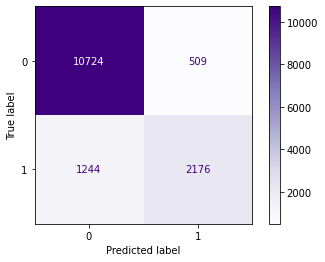

In [19]:
print("Classification report for classifier %s:\n%s\n"
      % (clsf, metrics.classification_report(testLabels, predLabels)))

plot_confusion_matrix(clsf, testData, testLabels, cmap='Purples', values_format='1.0f')
print()

####1.2. Train the classifier for different K and find the optimum one. ####

### <font color=slateblue>Answers:</font> ###

In [20]:
error = []
ks = [i*10 for i in range(0,20)]

for k in ks:
  if k==0: k=1
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(trainData, trainLabels)
  predLaels = knn.predict(testData)
  error.append(np.mean(predLaels != testLabels))

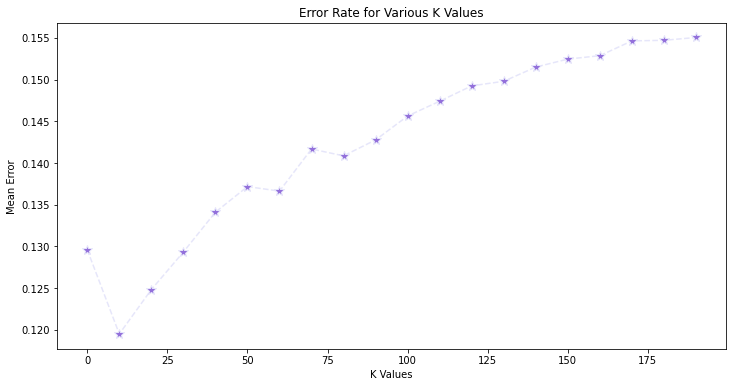

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(ks, error, color='lavender', linestyle='dashed', marker='*',
         markerfacecolor='mediumpurple', markersize=10)
plt.title('Error Rate for Various K Values')
plt.xlabel('K Values')
plt.ylabel('Mean Error')
print()

Based on the above plot, 10 neighbors is the optimum solution resulting in the minimum value for error based on its given definition. 

## <font color=mediumpurple>2. Parzen Window</font> ##


#### 2.1 Now train a kernerDensity model with diffrent kernels.

### <font color=slateblue>Answers:</font> ###

To implement a Parzen window, one of the features must be selected. For this case, a function is defined, given the name of kernel and the selected feature, an estimation of its PDF is given. 

In [22]:
def giveDensEst(h, kernelType, data, featureName):
  myKde = KernelDensity(bandwidth=h, kernel=kernelType)
  myKde.fit(data[:, None])

  dataToModel = np.linspace(min(data)-5, max(data)+5, len(data))
  logprob = myKde.score_samples(dataToModel[:, None])

  plt.fill_between(dataToModel, np.exp(logprob), alpha=0.5, color='slateblue')
  plt.plot(data, np.full_like(data, 0), '|', markeredgewidth=1, color='indigo')
  plt.title('Distribution Estimation of ' + featureName + ' by Employing ' + kernelType.capitalize()  + ' Kernel')
 


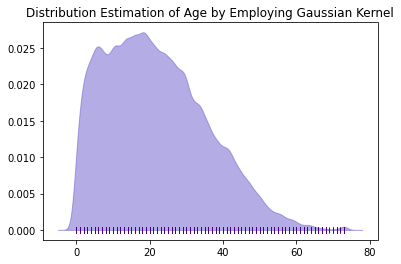

In [23]:
ageData = trainData['age'].to_numpy()
giveDensEst(1, 'gaussian', ageData, 'Age')

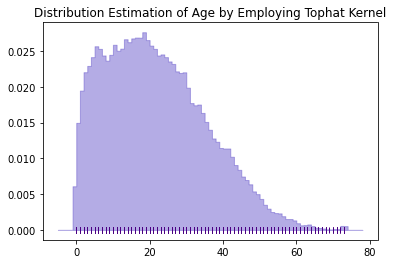

In [24]:
giveDensEst(1, 'tophat', ageData, 'Age')

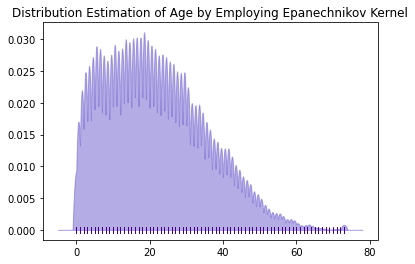

In [25]:
giveDensEst(1, 'epanechnikov', ageData, 'Age')

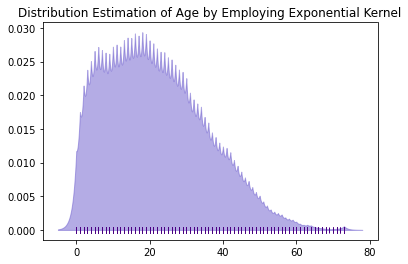

In [26]:
giveDensEst(1, 'exponential', ageData, 'Age')

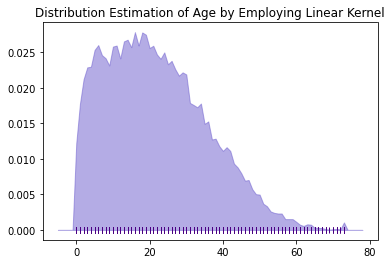

In [27]:
giveDensEst(1, 'linear', ageData, 'Age')

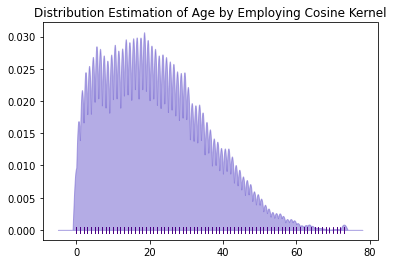

In [28]:
giveDensEst(1, 'cosine', ageData, 'Age')

We can also make a new data with know distribution and estimate its PDF

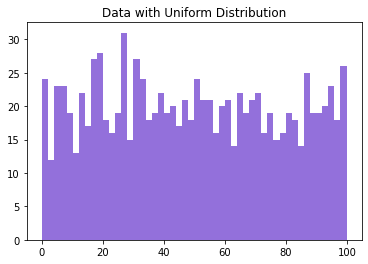

In [29]:
data = np.random.uniform(0,100,1000)

plt.title("Data with Uniform Distribution")
plt.hist(data, bins=50, color='mediumpurple')
print()

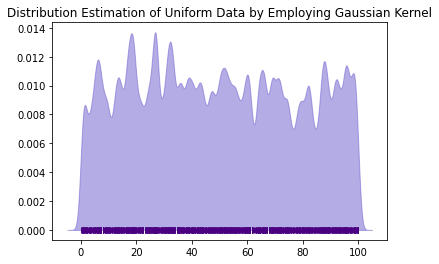

In [30]:
giveDensEst(1, 'gaussian', data, 'Uniform Data')

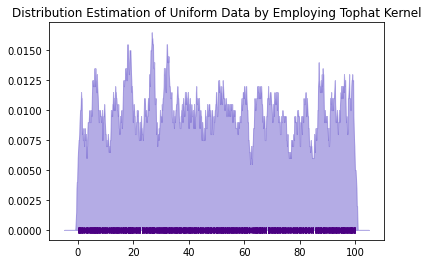

In [31]:
giveDensEst(1, 'tophat', data, 'Uniform Data')

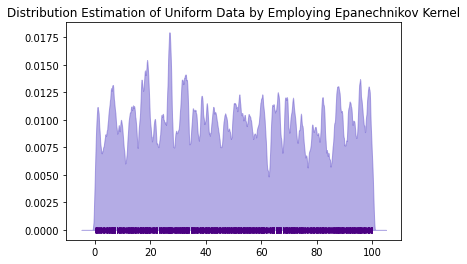

In [32]:
giveDensEst(1, 'epanechnikov', data, 'Uniform Data')

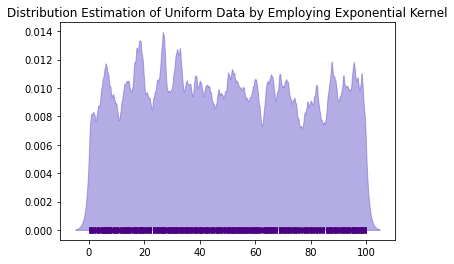

In [33]:
giveDensEst(1, 'exponential', data, 'Uniform Data')

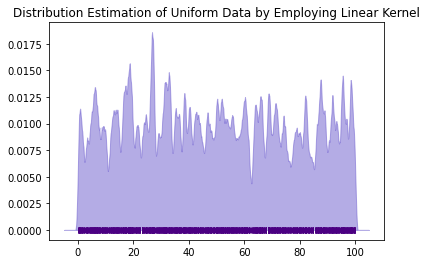

In [34]:
giveDensEst(1, 'linear', data, 'Uniform Data')

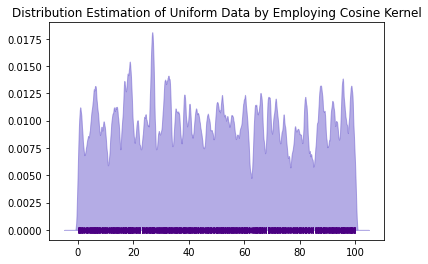

In [35]:
giveDensEst(1, 'cosine', data, 'Uniform Data')

## <font color=mediumpurple>3. Decision Tree</font> ##


####3.1 Train a decision tree model with find its accuracy.

### <font color=slateblue>Answers:</font> ###

Accuracy of this tree wih default settings: 100.00


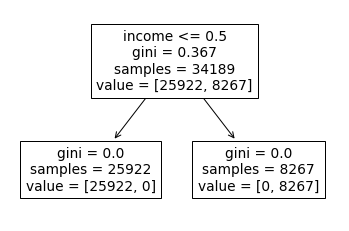

In [36]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(trainData, trainLabels)
predLabels = clf.predict(testData)

clm_names = [clm for clm in testData.columns]
tree.plot_tree(clf, feature_names=clm_names)
print("Accuracy of this tree wih default settings: %1.2f" %(metrics.accuracy_score(testLabels, predLabels)*100))

#### 3.2. Now change the model parameters to optimize it.

Accuracy of this tree after changing default settings: 100.00


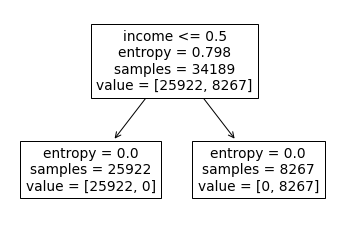

In [43]:
clf = tree.DecisionTreeClassifier(max_depth=5, random_state=0, criterion='entropy')
clf = clf.fit(trainData, trainLabels)
predLabels = clf.predict(testData)

clm_names = [clm for clm in trainData.columns]
tree.plot_tree(clf, feature_names=clm_names)
print("Accuracy of this tree after changing default settings: %1.2f" %(metrics.accuracy_score(testLabels, predLabels)*100))

## <font color=mediumpurple>4. Boosting</font> ##

#### Train a Boosting model for diffrrent max depth and different learning rate and find its accuracy for validation set.

### <font color=slateblue>Answers:</font> ###

In [38]:
def plotTable(clms, clmDataHeadears, alignSize):
    data = []
    
    for i in range(len(clms[list(clms.keys())[0]])):
        dataElement = []
        for key in clms.keys():
            dataElement.append(clms[key][i])
        data.append(dataElement)
        
    print(tabulate(data, headers=clmDataHeadears, tablefmt="fancy_grid", 
                   colalign=["center"]*alignSize))

#### <font color=slateblue>4.1. Set learning rate constant and max depth varying </font> ####

╒═══════════════════════════════╤════════╤═══════╤═══════╤═════╤══════╤══════╕
│           Max Depth           │  0.01  │  0.1  │  0.5  │  1  │  10  │  50  │
╞═══════════════════════════════╪════════╪═══════╪═══════╪═════╪══════╪══════╡
│           Accuracy            │ 75.82  │ 75.82 │ 75.82 │ 100 │ 100  │ 100  │
│  (with 0.05 as Learning Rate) │        │       │       │     │      │      │
╘═══════════════════════════════╧════════╧═══════╧═══════╧═════╧══════╧══════╛



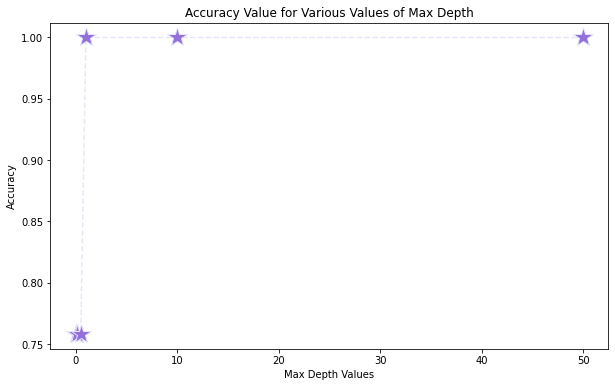

In [39]:
depList = [0.01, 0.1, 0.5, 1, 10, 50]
acc = []

for dep in depList:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.05, 
                                        max_depth=dep, random_state=0)
    gb_clf.fit(trainData, trainLabels)
    acc.append(gb_clf.score(trainData, trainLabels)*100)

plotTable({1:["Accuracy \n (with 0.05 as Learning Rate)"], 
            2:['{:1.2f}'.format(acc[0])],
            3:['{:1.2f}'.format(acc[1])],
            4:['{:1.2f}'.format(acc[2])],
            5:['{:1.2f}'.format(acc[3])],
            6:['{:1.2f}'.format(acc[4])],
            7:['{:1.2f}'.format(acc[5])]},
           ['Max Depth', depList[0], depList[1], depList[2], depList[3], depList[4], depList[5]], 7) 


plt.figure(figsize=(10, 6))
plt.plot(depList, [x/100 for x in acc], color='lavender', linestyle='dashed', marker='*',
         markerfacecolor='mediumpurple', markersize=20)
plt.title('Accuracy Value for Various Values of Max Depth')
plt.xlabel('Max Depth Values')
plt.ylabel('Accuracy')
print()


Therefore, the optimum value of max depth is 1 for this case 

#### <font color=slateblue>4.2. Set max depth constant and learning rate varying </font> ####

╒═══════════════════════════════╤════════╤════════╤════════╤════════╤═══════╤════════╕
│         Learning Rate         │  0.02  │  0.04  │  0.06  │  0.08  │  0.1  │  0.12  │
╞═══════════════════════════════╪════════╪════════╪════════╪════════╪═══════╪════════╡
│           Accuracy            │ 75.82  │  100   │  100   │  100   │  100  │  100   │
│  (with 0.05 as Learning Rate) │        │        │        │        │       │        │
╘═══════════════════════════════╧════════╧════════╧════════╧════════╧═══════╧════════╛



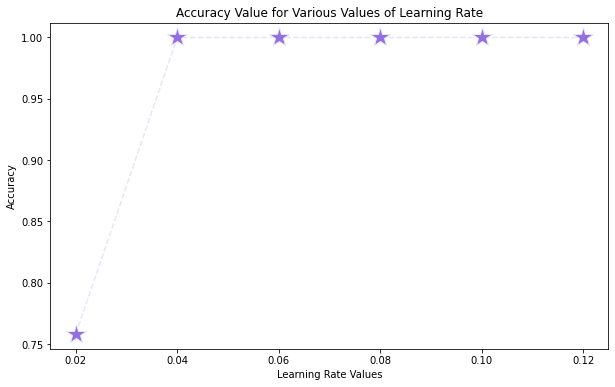

In [42]:
lrList = [i*0.02 for i in range(1,7)]
acc = []

for lr in lrList:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=lr, 
                                        max_depth=1, random_state=0)
    gb_clf.fit(trainData, trainLabels)
    acc.append(gb_clf.score(trainData, trainLabels)*100)

plotTable({1:["Accuracy \n (with 0.05 as Learning Rate)"], 
            2:['{:1.2f}'.format(acc[0])],
            3:['{:1.2f}'.format(acc[1])],
            4:['{:1.2f}'.format(acc[2])],
            5:['{:1.2f}'.format(acc[3])],
            6:['{:1.2f}'.format(acc[4])],
            7:['{:1.2f}'.format(acc[5])]},
           ['Learning Rate', lrList[0], lrList[1], lrList[2], lrList[3], lrList[4], lrList[5]], 7) 


plt.figure(figsize=(10, 6))
plt.plot(lrList, [x/100 for x in acc], color='lavender', linestyle='dashed', marker='*',
         markerfacecolor='mediumpurple', markersize=20)
plt.title('Accuracy Value for Various Values of Learning Rate')
plt.xlabel('Learning Rate Values')
plt.ylabel('Accuracy')
print()

As can be seen, the optimum value for learning rate is 0.04. 

In [41]:
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.04, 
                                        max_depth=1, random_state=0)
gb_clf.fit(trainData, trainLabels)
print('By Employing the optimum values based on above results, accuracy for test data is: %1.2f' %(gb_clf.score(testData, testLabels)*100))

By Employing the optimum values based on above results, accuracy for test data is: 100.00
